In [108]:
import pandas as pd

mrDF = pd.read_csv('mushrooms.csv')
mrDF.head(3)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m


In [110]:
mrDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [112]:
mrDF['class']

0       p
1       e
2       e
3       p
4       e
       ..
8119    e
8120    e
8121    e
8122    p
8123    e
Name: class, Length: 8124, dtype: object

In [117]:
# object -> numeric
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for col in mrDF.columns:
    mrDF[col] = label_encoder.fit_transform(mrDF[col])

In [118]:
mrDF.head(3)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3


In [123]:
y = mrDF['class'].values
X = mrDF.drop('class', axis = 1).to_numpy()

In [128]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=11)

In [129]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=5, criterion='entropy', splitter='random')
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, splitter='random')

In [130]:
from sklearn.metrics import accuracy_score

pred = model.predict(X_test)
score = accuracy_score(y_test, pred)
score

0.9985228951255539

[Text(158.10000000000002, 199.32, 'X[7] <= 0.832\nentropy = 0.999\nsamples = 6093\nvalue = [3139, 2954]'),
 Text(74.4, 163.07999999999998, 'X[19] <= 1.797\nentropy = 0.883\nsamples = 4192\nvalue = [2927, 1265]'),
 Text(37.2, 126.83999999999999, 'X[19] <= 0.469\nentropy = 0.171\nsamples = 1216\nvalue = [31, 1185]'),
 Text(18.6, 90.6, 'entropy = 0.0\nsamples = 31\nvalue = [31, 0]'),
 Text(55.800000000000004, 90.6, 'entropy = 0.0\nsamples = 1185\nvalue = [0, 1185]'),
 Text(111.60000000000001, 126.83999999999999, 'X[17] <= 0.797\nentropy = 0.179\nsamples = 2976\nvalue = [2896, 80]'),
 Text(93.0, 90.6, 'entropy = 0.0\nsamples = 27\nvalue = [0, 27]'),
 Text(130.20000000000002, 90.6, 'X[17] <= 1.314\nentropy = 0.13\nsamples = 2949\nvalue = [2896, 53]'),
 Text(111.60000000000001, 54.359999999999985, 'entropy = 0.0\nsamples = 2505\nvalue = [2505, 0]'),
 Text(148.8, 54.359999999999985, 'X[19] <= 6.552\nentropy = 0.528\nsamples = 444\nvalue = [391, 53]'),
 Text(130.20000000000002, 18.119999999999

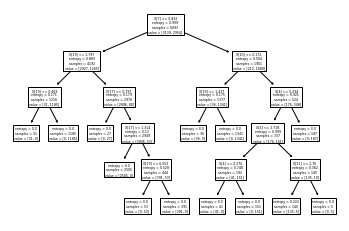

In [131]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plot_tree(model)

In [132]:
# 특성 중요도
ip = model.feature_importances_
ip

array([0.        , 0.        , 0.        , 0.        , 0.07098451,
       0.        , 0.        , 0.23548872, 0.        , 0.        ,
       0.03895748, 0.00352891, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.04902723, 0.        , 0.60201315,
       0.        , 0.        ])

In [176]:
ip_df = pd.DataFrame(ip, index=mrDF.columns[1:])
ip_df= ip_df.sort_values(by=0, ascending=True)
ip_df.head()

,0
cap-shape,0.0
ring-type,0.0
veil-color,0.0
veil-type,0.0
stalk-color-below-ring,0.0


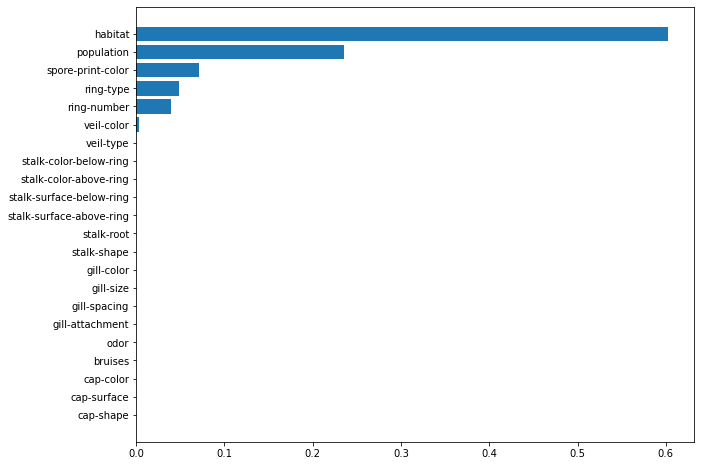

In [177]:
plt.figure(figsize=(10, 8))
plt.barh(mrDF.columns[1:], ip_df[0])
plt.show()